In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### 1- Data loading.

In [2]:
data = pd.read_csv("data/data_telco.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
print(f"There is about {len(data.columns)} column in the dataset")

There is about 44 column in the dataset


Looking at the columns, we can first get rid of some columnes like customer id, which doesn't add much information. 


In [3]:
data.drop(["customerID"], inplace = True, axis = 1)



### 2- Data exploration.

In [4]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


Columns seems to not have null values, however a certain column called totalcharges is an object type, which is weird because it should be a numerical one.

In [6]:
non_float_elements = pd.to_numeric(data.totalcharges, errors='coerce').isnull()
data[non_float_elements]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


It seems that this variable is not calculated for new clients as indicated by the tenure=0.

Since they are new, and still didn't pay charges yet, we will consider the totalcharges as null.



In [7]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'],errors='coerce', downcast='float')

In [8]:
# we fill the totalcharged missing values with the product of the totalcharges and tenure. 
data['totalcharges'].fillna(0,inplace=True)

In [9]:
data['totalcharges'].describe()

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: totalcharges, dtype: float64

#### Exploring target feature

is the target data balanced? 

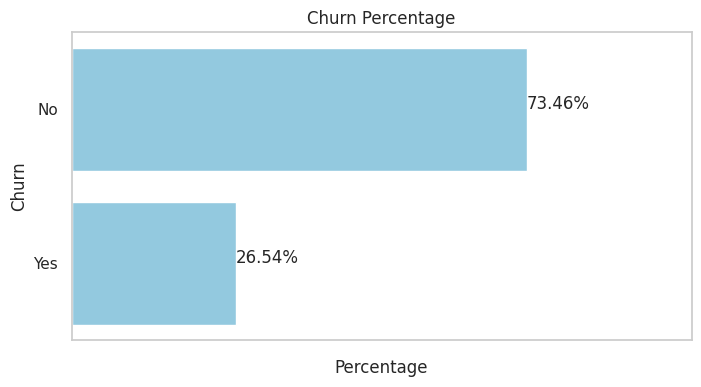

In [10]:
# Calculate the percentages
percentage_counts = data['churn'].value_counts(normalize=True) * 100

# Set a smaller figure size
plt.figure(figsize=(8, 4))

# Create a horizontal bar plot with percentages
sns.set(style="whitegrid")
ax = sns.barplot(x=percentage_counts.values, y=percentage_counts.index, color="skyblue")

# Add percentages as labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left')

# Customize the plot aesthetics
plt.xlabel('Percentage')
plt.ylabel('Churn')
plt.title('Churn Percentage')
plt.xlim(0, 100)

# Remove grid lines and x-axis labels
ax.set(xticklabels=[])
# Turns off grid on the left Axis.
ax.grid(False)
# Display the plot
plt.show()


The data is clearly unbalanced. It is better to wait the results of data modelisation before attempting any data balance. 

In [11]:
seniorcitizen_map = {1:'yes', 0:'no'}
data['seniorcitizen'] = data['seniorcitizen'].map(seniorcitizen_map)
print(data["seniorcitizen"])

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: seniorcitizen, Length: 7043, dtype: object


In [12]:
data_categorical = data[data.select_dtypes(include=['object']).columns.tolist()]


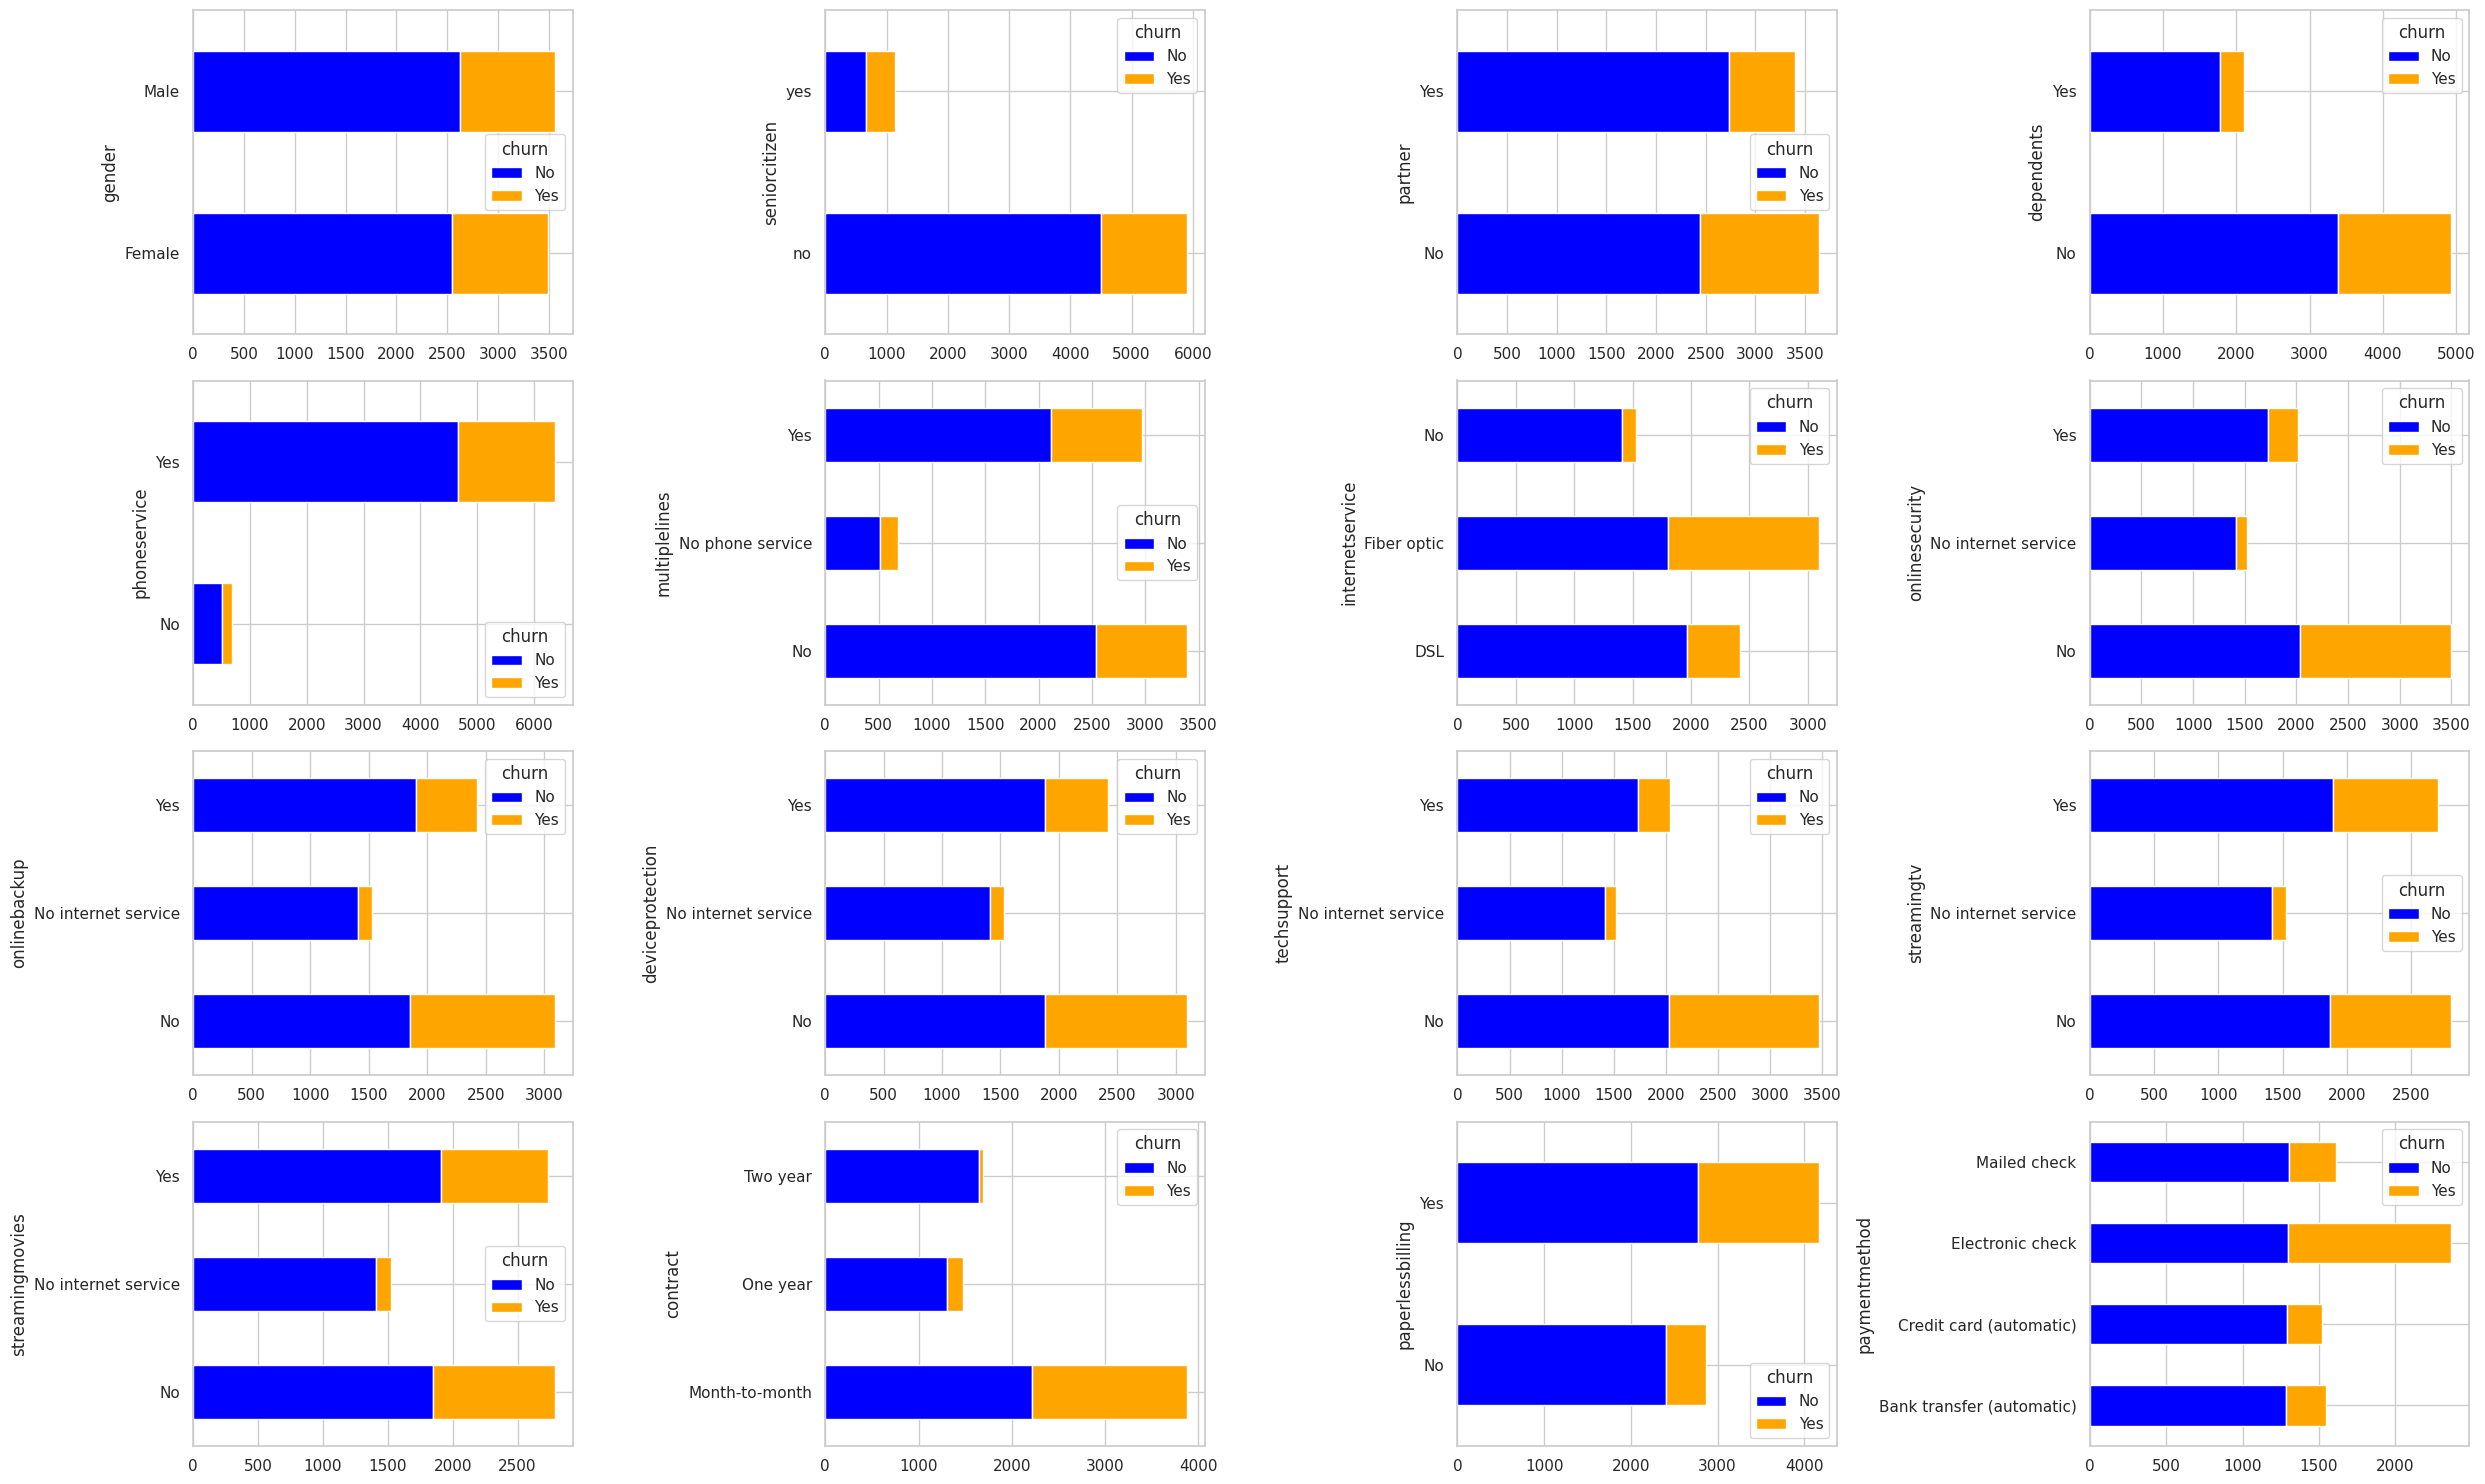

In [13]:
#define number of rows and columns for subplots
nrow=4
ncol=4

# make a list of all dataframes 
fig, axes = plt.subplots(nrow, ncol,figsize=(25,15))

# plot counter
count=0
columns = data_categorical.columns
for r in range(nrow):
    for c in range(ncol):
        pd.crosstab(data_categorical[columns[count]], data_categorical["churn"]).plot(kind='barh', stacked=True,color=['blue','orange'],ax=axes[r,c])
        count+=1
    
plt.tight_layout()

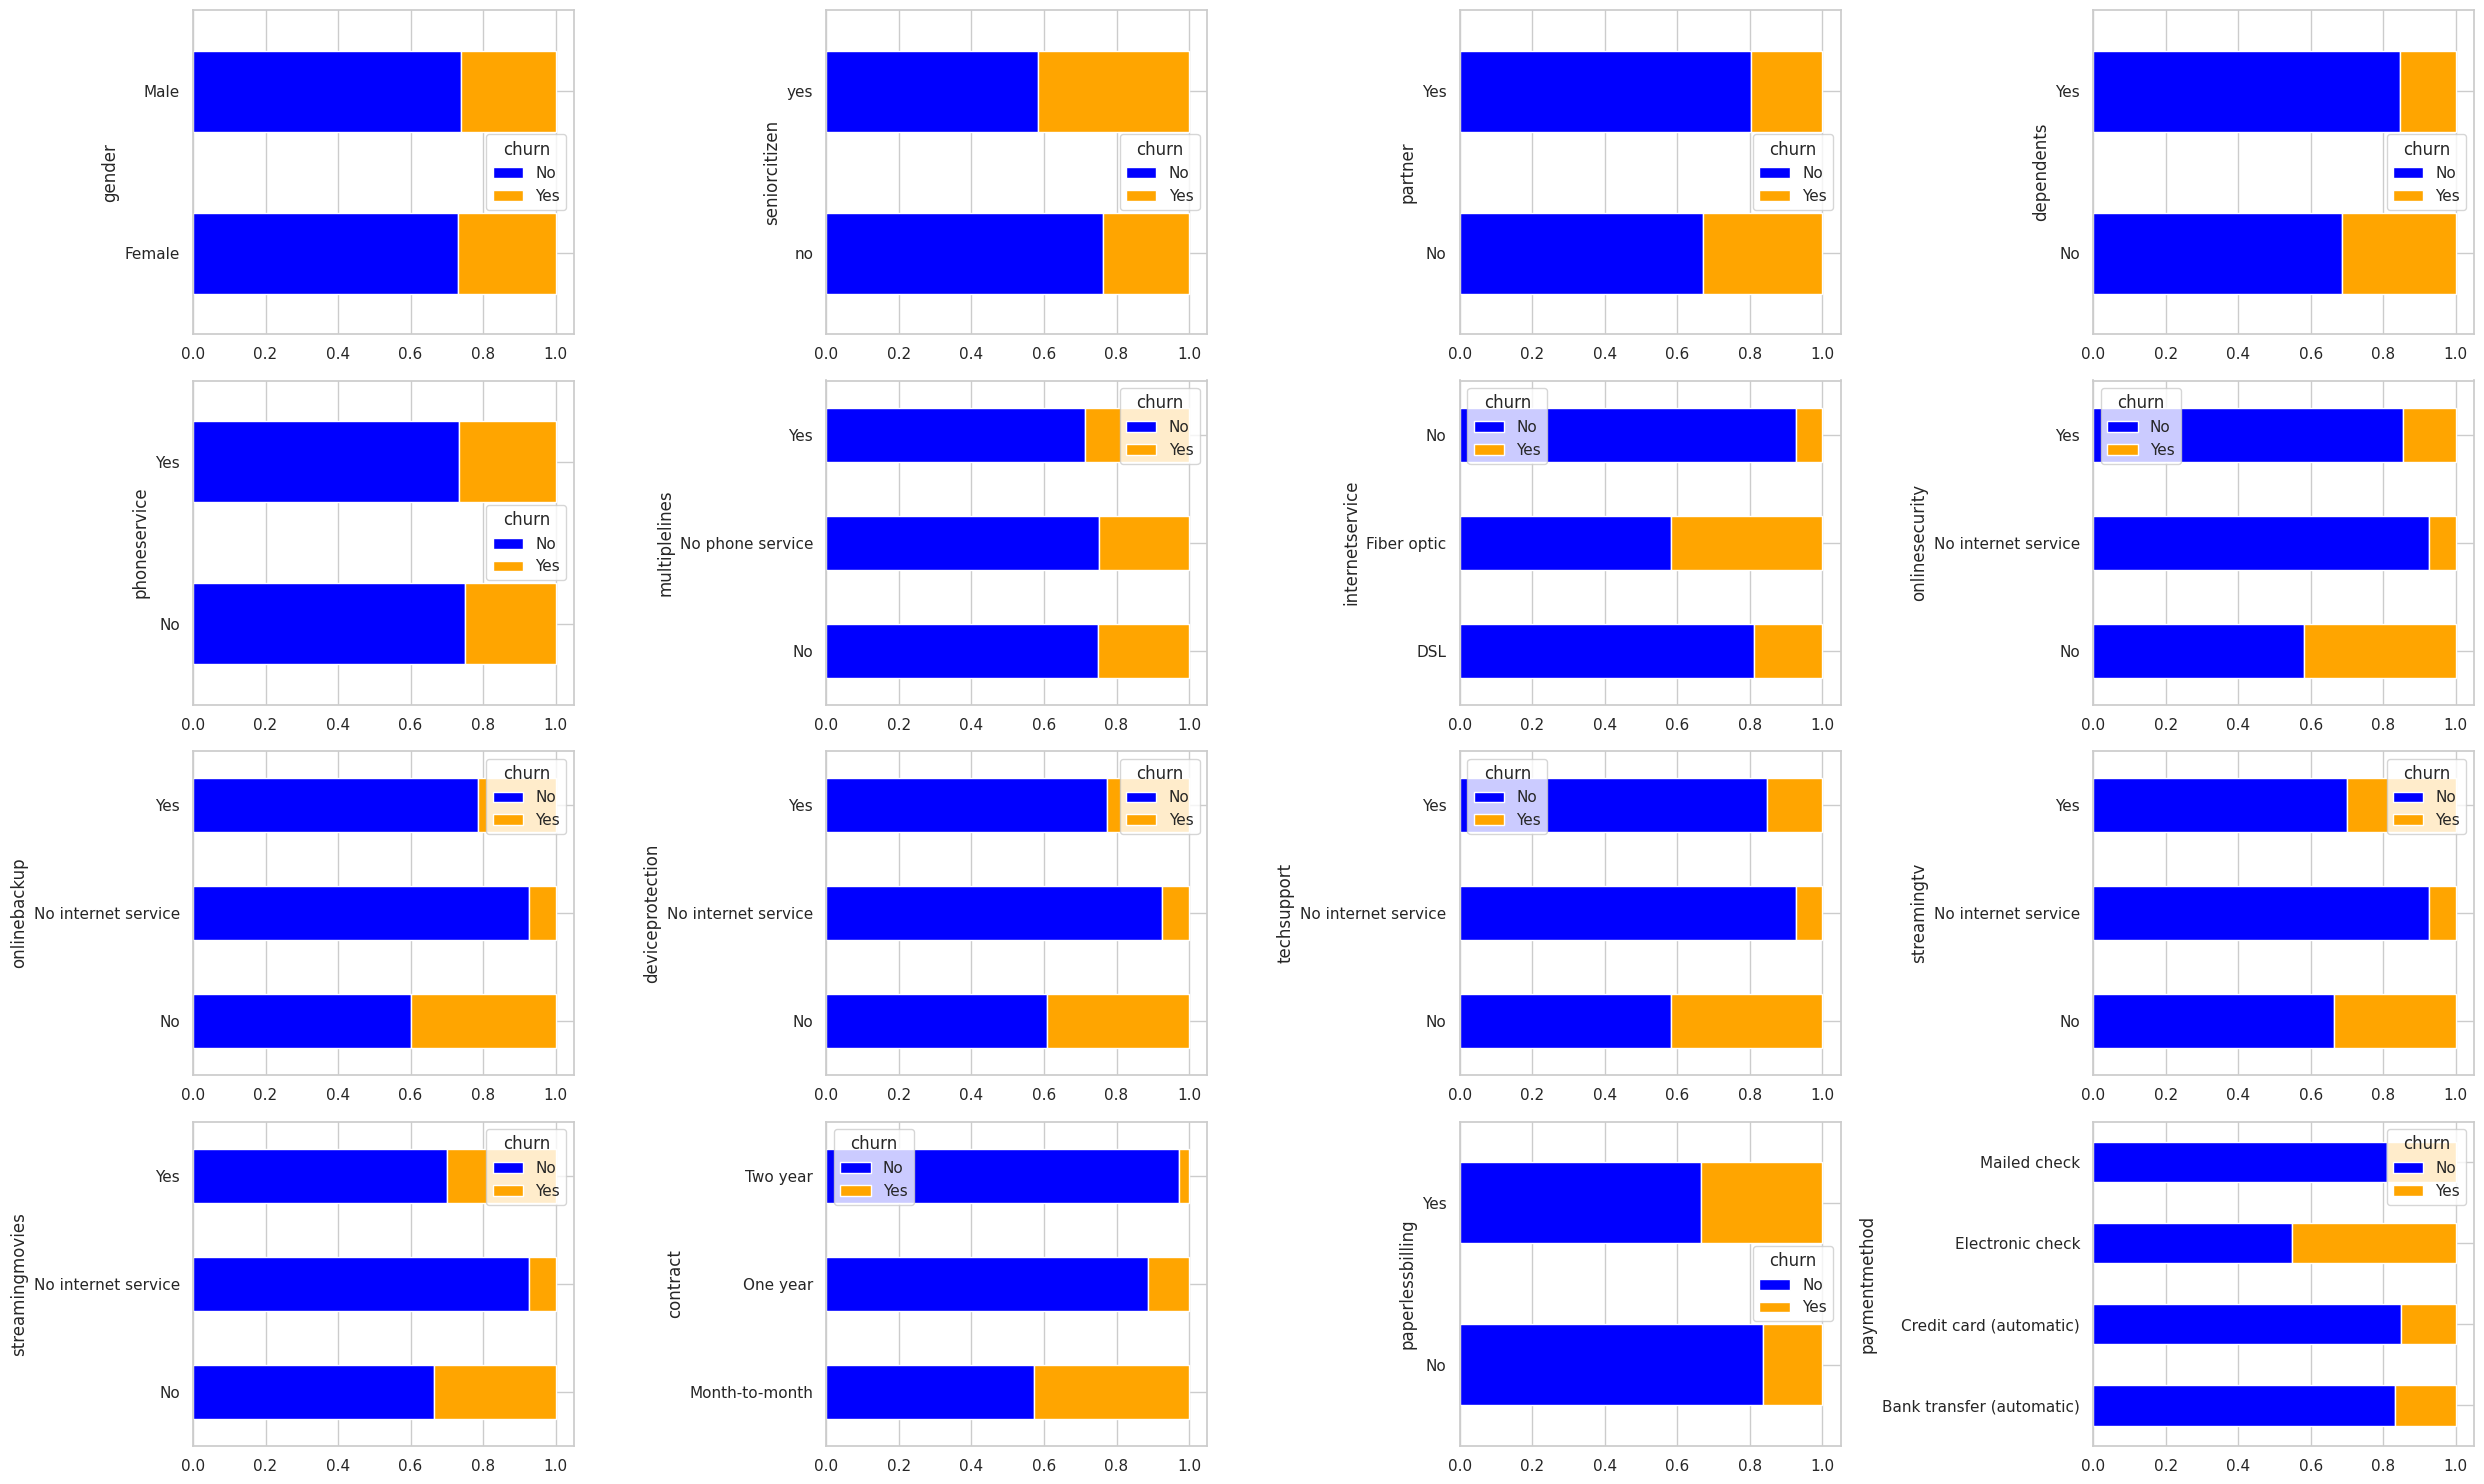

In [14]:
#define number of rows and columns for subplots
nrow=4
ncol=4

# make a list of all dataframes 
fig, axes = plt.subplots(nrow, ncol,figsize=(25,15))

# plot counter
count=0
columns = data_categorical.columns
for r in range(nrow):
    for c in range(ncol):
        pd.crosstab(data_categorical[columns[count]], data_categorical["churn"],normalize="index").plot(kind='barh', stacked=True,color=['blue','orange'],ax=axes[r,c])
        count+=1
plt.tight_layout()

In [15]:
data_numerical = data[data.select_dtypes(include=[np.number]).columns.tolist()]

In [16]:
data_numerical.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734375
std,24.559481,30.090047,2266.794434
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.549988
50%,29.000000,70.350000,1394.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


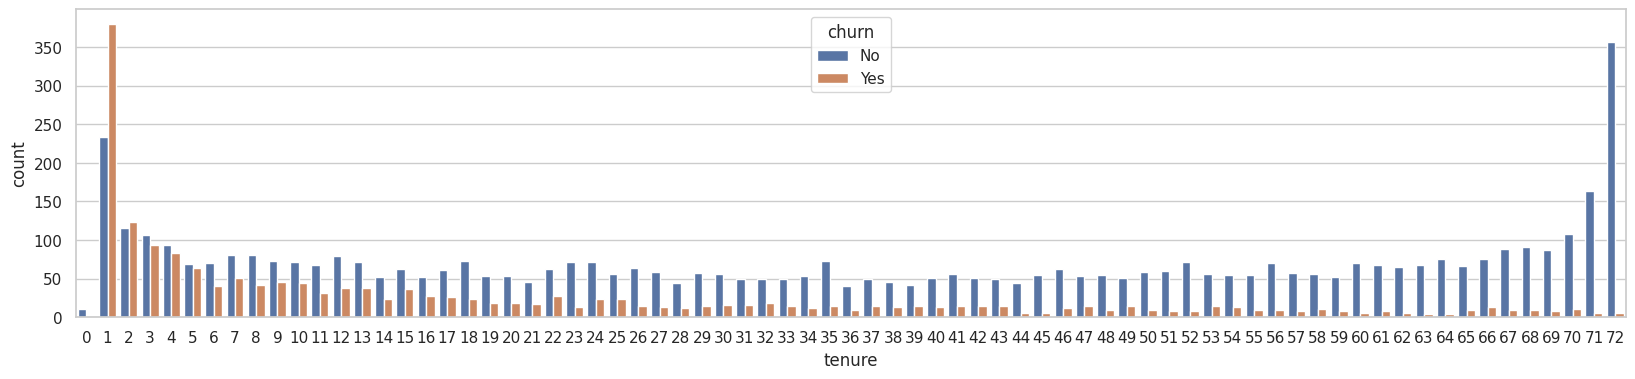

In [17]:

plt.figure(figsize=(20, 4))
# Create a horizontal bar plot with percentages
ax = sns.countplot(x=data['tenure'],hue=data['churn'])
# Display the plot
plt.show()

Tenure is the number of months a person is a client to this  telecom company. We notice that new clients with a tenure less than 6 months are more likely to churn, compared to those who are clients for few years. 

In order to simplify the calcul, we create several groups .


In [18]:
def tenure(x):
    if x<=6:
        return 1
    elif x>6 and x<=12:
        return 2
    elif x>12 and x<=18:
        return 3
    elif x>18 and x<=24:
        return 4
    elif x>24 and x<=30:
        return 5
    else:
        return 6

data["tenure_class"]=data["tenure"].apply(lambda x: tenure(x))

<Axes: xlabel='tenure_class'>

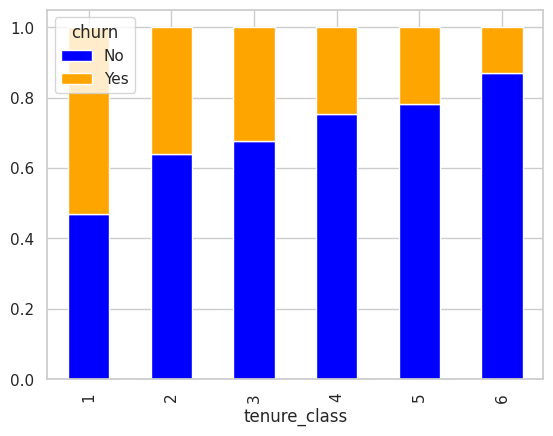

In [19]:
pd.crosstab(data["tenure_class"], data["churn"],normalize="index").plot(kind='bar', stacked=True,color=['blue','orange'])


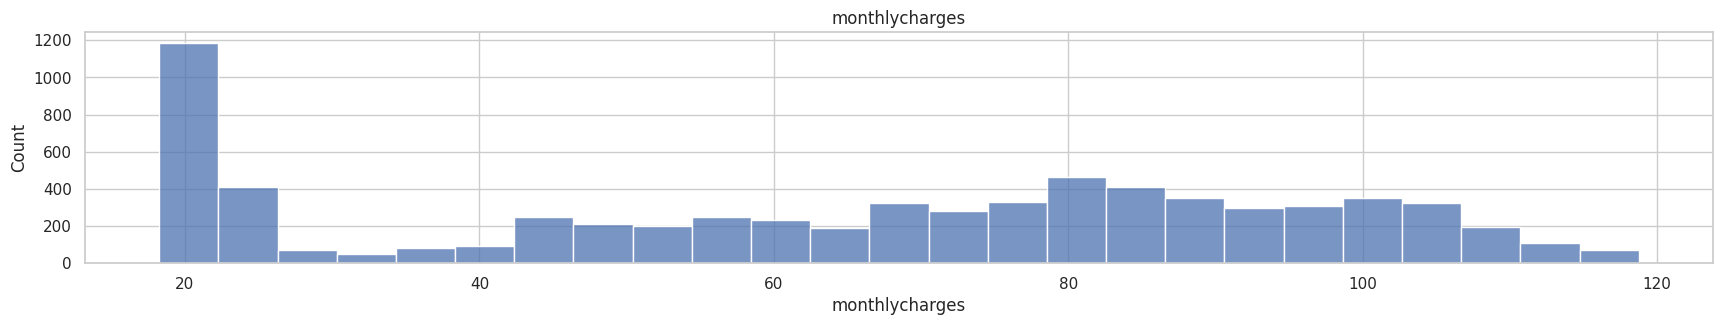

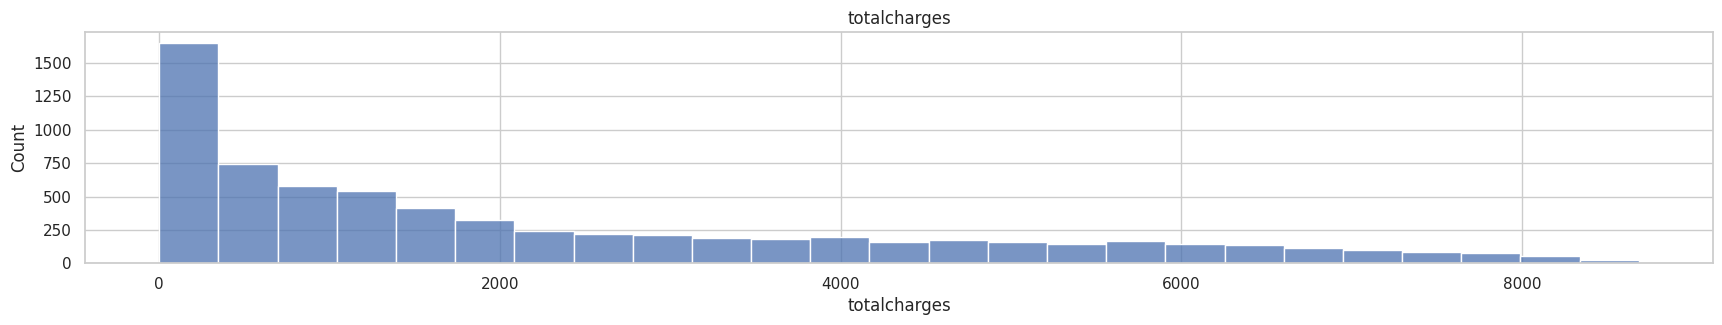

In [20]:

for i, col in enumerate(['monthlycharges','totalcharges']):
    plt.figure(figsize=(21, 3))
    ax= sns.histplot(data_numerical[col],bins=25)
    plt.title(col)
    plt.show()

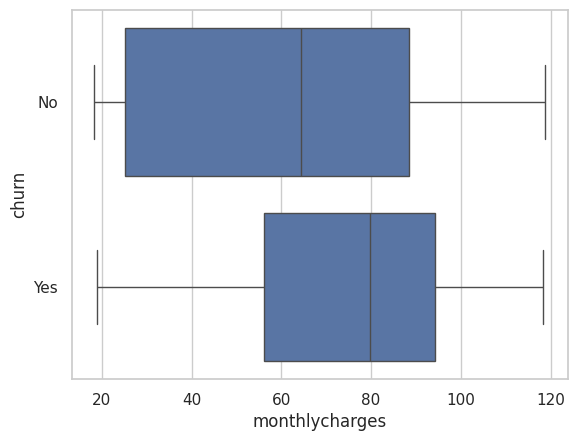

In [21]:
sns.boxplot( y=data["churn"], x=data["monthlycharges"] )
plt.show()

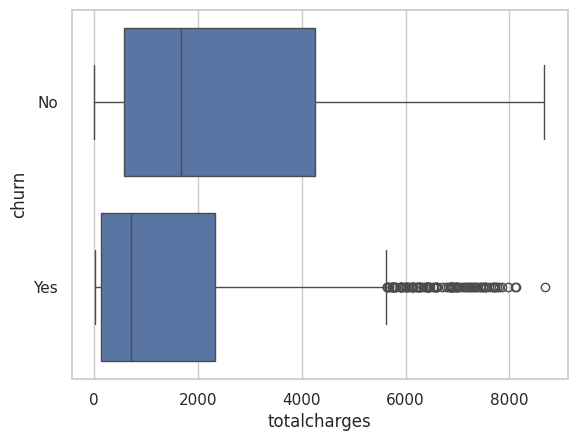

In [22]:
sns.boxplot( y=data["churn"], x=data["totalcharges"] )
plt.show()

In [23]:
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_class
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,1
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,6
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,1
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,6
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,1


In [24]:
# Get unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f' {column}:        {unique_values}')

 gender:        ['Female' 'Male']
 seniorcitizen:        ['no' 'yes']
 partner:        ['Yes' 'No']
 dependents:        ['No' 'Yes']
 tenure:        [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 phoneservice:        ['No' 'Yes']
 multiplelines:        ['No phone service' 'No' 'Yes']
 internetservice:        ['DSL' 'Fiber optic' 'No']
 onlinesecurity:        ['No' 'Yes' 'No internet service']
 onlinebackup:        ['Yes' 'No' 'No internet service']
 deviceprotection:        ['No' 'Yes' 'No internet service']
 techsupport:        ['No' 'Yes' 'No internet service']
 streamingtv:        ['No' 'Yes' 'No internet service']
 streamingmovies:        ['No' 'Yes' 'No internet service']
 contract:        ['Month-to-month' 'One year' 'Two year']
 paperlessbilling:        ['Yes' 'No']
 paymentmethod:        ['Electronic ch

In [161]:

def encode_columns(data, columns_to_encode):
    # Get a list of all column names except the ones to encode
    columns_to_keep = [col for col in data.columns if col not in columns_to_encode]
    # One-hot encode selected columns
    one_hot_encoded = pd.get_dummies(data, columns=columns_to_encode)
    return one_hot_encoded


In [164]:
def rename_labels_to_binary(df,columns):
    mapping = {'yes': 1, 'no': 0}
    transformed_columns = df[columns].map(lambda x: mapping.get(x.lower(), 2))
    # Combine the transformed columns with the original DataFrame
    result_df = pd.concat([transformed_columns, df.drop(columns=columns)], axis=1)
    return result_df

def data_preparation(path):
    # read data using path
    data = pd.read_csv(path)
    # set all columns in lower capitals 
    data.columns = data.columns.str.lower()
    # drop the id column that isn't useful
    data.drop(["customerid"], inplace = True, axis = 1)
    # replace some null values in totalcharges
    data['totalcharges'] = pd.to_numeric(data['totalcharges'],errors='coerce', downcast='float')
    data['totalcharges'].fillna(0,inplace=True)
    # create classes in tenure and drop this column  
    data["tenure_class"]=data["tenure"].apply(lambda x: tenure(x))
    data = data.drop("tenure",axis=1)
    columns = ['partner', 'dependents',
       'phoneservice', 'multiplelines', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling',
       'churn']
    data = rename_labels_to_binary(data,columns)
    # List of column names to one-hot encode
    columns_to_encode = ['gender','internetservice','contract','paymentmethod']
    data = encode_columns(data, columns_to_encode)

    return data

In [166]:
path = "data/data_telco.csv"
data = data_preparation(path)
data.head()

,partner,dependents,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,0,0,2,0,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,1,0,1,0,1,0,0,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,1,0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,2,1,0,1,1,0,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,1,0,0,0,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


### Data split into train and test.

In [167]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10


dataX = data.loc[:, data.columns != "churn"].values
dataY = data['churn']
print(y_train)
# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3,random_state=2)



      churn  churn
1734      1      1
2510      1      1
5244      0      0
3813      0      0
4717      0      0
...     ...    ...
6443      0      0
3606      0      0
5704      0      0
6637      0      0
2575      0      0

[4930 rows x 2 columns]


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
logistic_Reg = LogisticRegression()
pipe = Pipeline(steps=[('logistic_Reg', logistic_Reg)])
parameters = dict(logistic_Reg__C=C, logistic_Reg__penalty=penalty)
logreg_cv=GridSearchCV(pipe,parameters,cv=10)
logreg_cv.fit(x_train,y_train)



/home/mouna/[MLOPS][Portfolio]Telco_prediction_churn/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mouna/[MLOPS][Portfolio]Telco_prediction_churn/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Best Penalty: l2
Best C: 0.5689866029018293
LogisticRegression(C=0.5689866029018293)


/home/mouna/[MLOPS][Portfolio]Telco_prediction_churn/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
print('Best Penalty:', logreg_cv.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', logreg_cv.best_estimator_.get_params()['logistic_Reg__C'])
print(logreg_cv.best_estimator_.get_params()['logistic_Reg'])
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Best Penalty: l2
Best C: 0.5689866029018293
LogisticRegression(C=0.5689866029018293)
tuned hpyerparameters :(best parameters)  {'logistic_Reg__C': 0.5689866029018293, 'logistic_Reg__penalty': 'l2'}
accuracy : 0.8068965517241379


In [177]:
y_pred = logreg_cv.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_cv.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1569
           1       0.64      0.49      0.56       544

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



le modèle ne capture que 50% des vrai churneurs, et 64% des prédictions faites par le modèle pour la classe churn est vrai.


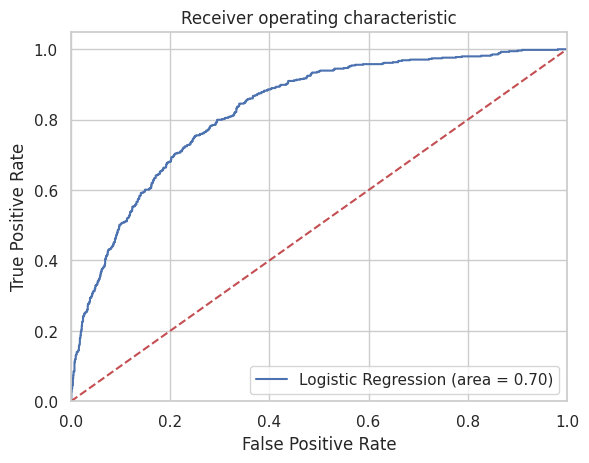

In [182]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_cv.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Deploying the model

* Save the model :